# Length-effect

The spatial upscaling technique as described in the current section is done over homogeneous reaches of the flood defense. Homogenous in this case means the statistical characteristics remain constant. It is therefore relevant that the flood defence system is divided into segments for which the assumption of homogeneity is valid. So, if a dike segment is inhomogeneous, it needs to be split up into smaller, homogenous, segments.

Spatial upscaling is subject to a concept known as the length effect. The length effect essentially has to do with the increase in failure probability when going from a cross-section to a longitudinal segment and from a single segment to a flood defense system (interconnected segments). That is, the length effect refers to the effect that an increase in length has on the probability of failure. Note that this effect is also present when upscaling over time; the failure probability will increase as the considered time period increases.

First, let's import the necessary package:

In [78]:
from streams import *
import numpy as np
import matplotlib.pyplot as plt

Next, we define a simple limit state function: 

$Z = 1.9 - (a+b)$

This is a linear model involving two variables, $a$ and $b$.

In [79]:
def linear(a, b):
    return 1.9 - (a+b)

In [80]:
project = ReliabilityProject()
project.model = linear

project.variables["a"].distribution = DistributionType.normal
project.variables["a"].mean = 0.0
project.variables["a"].deviaion = 1.0
project.variables["b"].distribution = DistributionType.normal
project.variables["b"].mean = -1.0
project.variables["b"].deviation = 1.0

project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 50
project.settings.variation_coefficient = 0.02

project.run()
dp_cross_section = project.design_point

The parameter $d_x$ is the spatial correlation length of a variable and determines how quickly the correlation of the variable decreases over distance. The parameter $\rho_x$ is the minimum correlation of the variable between two locations of the same (homogeneous) segment. Both parameters need to be determined for each variable, based on a combination of measurements and expert judgement.

In [81]:
def autocorrelation(x, d_x, rho_x):
    return rho_x + (1-rho_x)*np.exp(-x**2/d_x**2)

Text(0.5, 0, 'distance [m]')

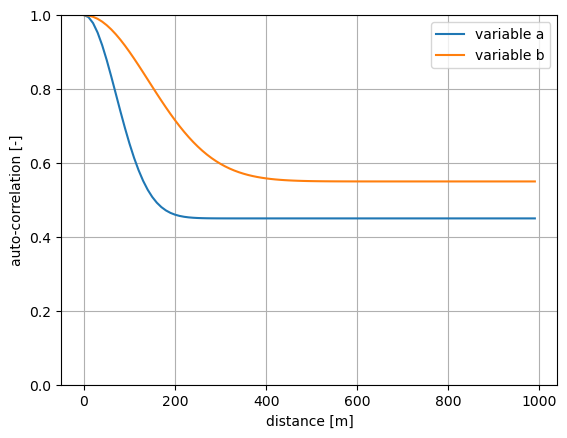

In [84]:
length_effect = LengthEffectProject()
length_effect.design_point_cross_section = dp_cross_section

length_effect.length = 1000.0
d_x = [100.0, 200.0]
rho_x = [0.45, 0.55]
length_effect.correlation_lengths = d_x
length_effect.correlation_matrix["a"] = rho_x[0]
length_effect.correlation_matrix["b"] = rho_x[1]

x = np.arange(0.0, length_effect.length, 10.0)
autocorr_a = [autocorrelation(val, d_x[0], rho_x[0]) for val in x]
autocorr_b = [autocorrelation(val, d_x[1], rho_x[1]) for val in x]

plt.plot(x, autocorr_a, label='variable a')
plt.plot(x, autocorr_b, label='variable b')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.ylabel('auto-correlation [-]')
plt.xlabel('distance [m]')


Text(0.5, 0, 'minimum_failure_length [m]')

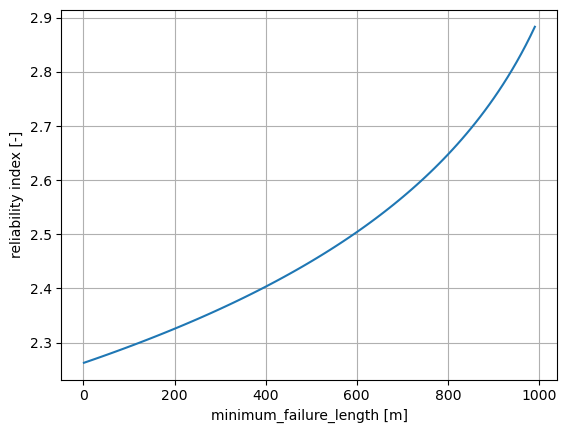

In [86]:
minimum_failure_length = np.arange(1.0, length_effect.length, 10.0)
beta_section = []

for val in minimum_failure_length:

    length_effect.minimum_failure_length = val
    length_effect.run()
    dp_section = length_effect.design_point
    beta_section.append(dp_section.reliability_index)

plt.plot(minimum_failure_length, beta_section)
plt.grid()
plt.ylabel('reliability index [-]')
plt.xlabel('minimum_failure_length [m]')